In [1]:
cd /g/data/mn51/users/gt3409/plotting_maps/

/g/data/mn51/users/gt3409/plotting_maps


In [2]:
from acs_plotting_maps import plot_acs_hazard, regions_dict, cmap_dict, tick_dict, plot_acs_hazard_3pp
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib import colors, cm


In [3]:
plot_acs_hazard_3pp?

Signature:
plot_acs_hazard_3pp(
    name='ncra_regions',
    regions=None,
    ds_gwl15=None,
    ds_gwl20=None,
    ds_gwl30=None,
    station_df=None,
    stippling=None,
    mask_not_australia=True,
    mask_australia=False,
    agcd_mask=False,
    facecolor='none',
    edgecolor='black',
    figsize=(10, 4),
    title=None,
    date_range='',
    crs=None,
    area_linewidth=0.3,
    xlim=(114, 154),
    ylim=(-43, -8),
    cmap=<matplotlib.colors.LinearSegmentedColormap object at 0x14fe85bc6590>,
    cmap_bad='lightgrey',
    cbar_extend='both',
    ticks=None,
    tick_labels=None,
    cbar_label='',
    baseline=None,
    dataset_name=None,
    issued_date=None,
    label_states=False,
    contourf=False,
    contour=False,
    select_area=None,
    land_shadow=False,
    watermark='EXPERIMENTAL\nIMAGE ONLY',
    watermark_color='r',
    show_logo=False,
    infile=None,
    outfile=None,
    savefig=True,
)
Docstring:
Three panel plot. 
As with plot_acs_hazard, but takes three

In [4]:
# Fire classes

In [5]:
%%time
regions = regions_dict['ncra_regions']

CPU times: user 4min 14s, sys: 2.22 s, total: 4min 16s
Wall time: 4min 19s


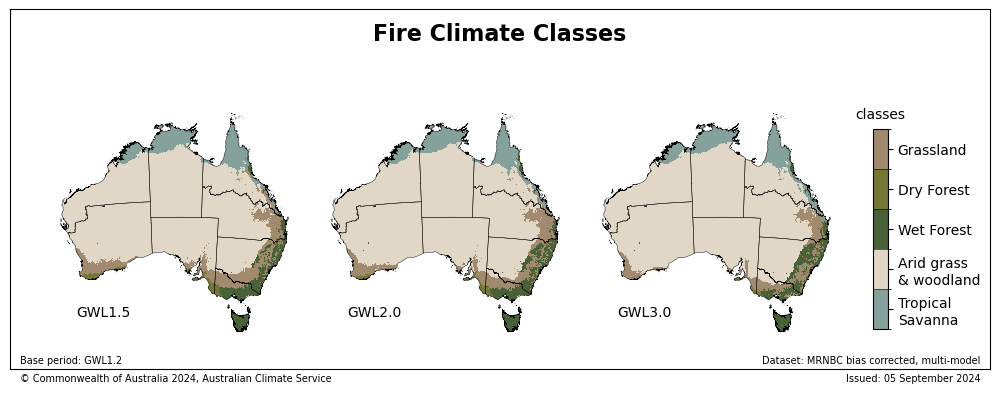

In [6]:
%%time 
ds_gwl15 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL15.nc")
ds_gwl20 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL2.nc")
ds_gwl30 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL3.nc")

var = "fire_climate_class"

plot_acs_hazard_3pp(ds_gwl15=ds_gwl15[var],
                    ds_gwl20=ds_gwl20[var],
                    ds_gwl30=ds_gwl30[var],
                    regions = regions,
                    title = "Fire Climate Classes",
                    baseline="GWL1.2",
                    cmap = cmap_dict["fire_climate"],
                    ticks = tick_dict["fire_climate_ticks"],
                    tick_labels = ["Tropical\nSavanna","Arid grass \n& woodland","Wet Forest","Dry Forest","Grassland",],
                    cbar_label = "classes",
                    dataset_name = "MRNBC bias corrected, multi-model",
                    watermark="",
                    );

CPU times: user 2min 20s, sys: 378 ms, total: 2min 20s
Wall time: 2min 20s


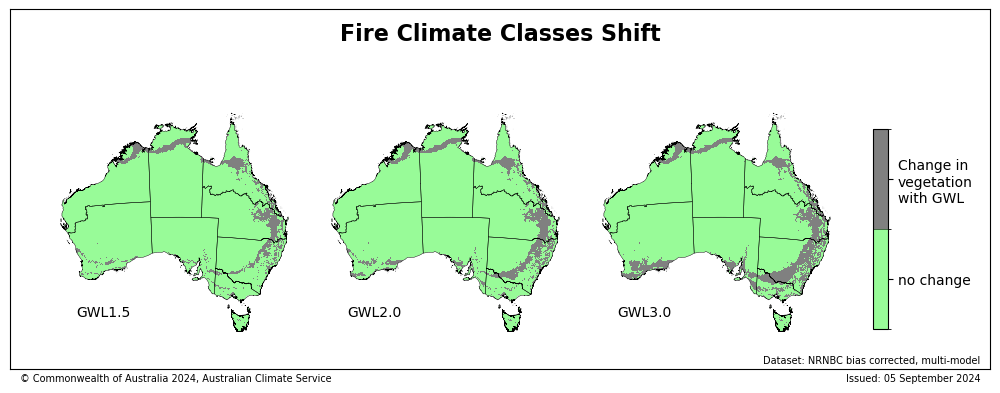

In [7]:
%%time 
ds_gwl15 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_shift_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL12_to_GWL15.nc")
ds_gwl20 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_shift_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL12_to_GWL2.nc")
ds_gwl30 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_shift_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL12_to_GWL3.nc")

var = "fire_climate_class"

plot_acs_hazard_3pp(ds_gwl15=ds_gwl15[var],
                    ds_gwl20=ds_gwl20[var],
                    ds_gwl30=ds_gwl30[var],
                    regions = regions,
                    title = "Fire Climate Classes Shift",
                    cmap = colors.ListedColormap(["palegreen", "grey",]),
                    ticks = [0, 1,],
                    tick_labels = ["no change", "Change in\nvegetation\nwith GWL",],
                    cbar_label = "",
                    dataset_name = "NRNBC bias corrected, multi-model",
                    watermark="",
                    );

In [8]:
# heat

CPU times: user 2min 11s, sys: 321 ms, total: 2min 12s
Wall time: 2min 12s


(<Figure size 1000x400 with 5 Axes>, <Axes: >)

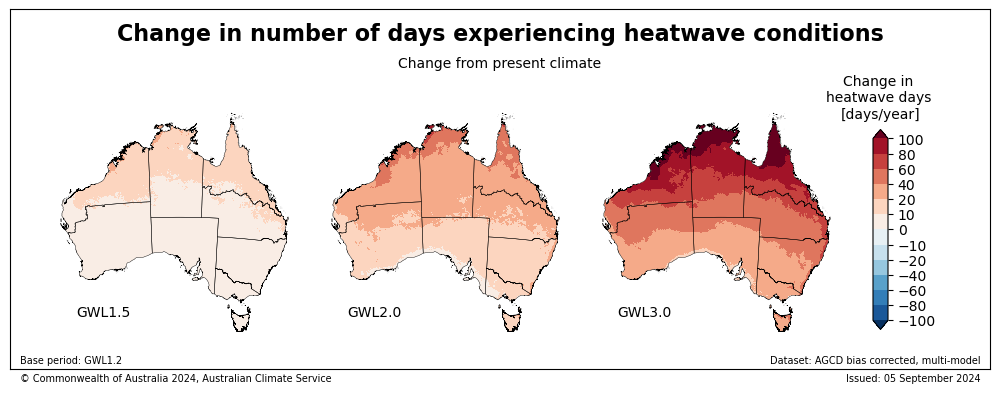

In [9]:
%%time 

var = "HWF"

ds_gwl15 = xr.open_dataset(f"/g/data/ia39/ncra/heat/data/{var}/bias-corrected/ensemble/GWL-change/{var}_AGCD-05i_MME50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL15-GWL12-change.nc")
ds_gwl20 = xr.open_dataset(f"/g/data/ia39/ncra/heat/data/{var}/bias-corrected/ensemble/GWL-change/{var}_AGCD-05i_MME50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL20-GWL12-change.nc")
ds_gwl30 = xr.open_dataset(f"/g/data/ia39/ncra/heat/data/{var}/bias-corrected/ensemble/GWL-change/{var}_AGCD-05i_MME50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL30-GWL12-change.nc")


plot_acs_hazard_3pp(ds_gwl15=ds_gwl15[var],
                    ds_gwl20=ds_gwl20[var],
                    ds_gwl30=ds_gwl30[var],
                    regions = regions,
                    title = "Change in number of days experiencing heatwave conditions",
                    date_range = f"Change from present climate",
                    baseline="GWL1.2",
                    cmap = cmap_dict["tas_anom"],
                    ticks = [-100, -80, -60, -40, -20, -10, 0, 10, 20, 40, 60, 80, 100],
                    cbar_label = "Change in \nheatwave days \n[days/year]",
                    dataset_name = "AGCD bias corrected, multi-model",
                    watermark="",)

CPU times: user 2min 12s, sys: 273 ms, total: 2min 12s
Wall time: 2min 13s


(<Figure size 1000x400 with 5 Axes>, <Axes: >)

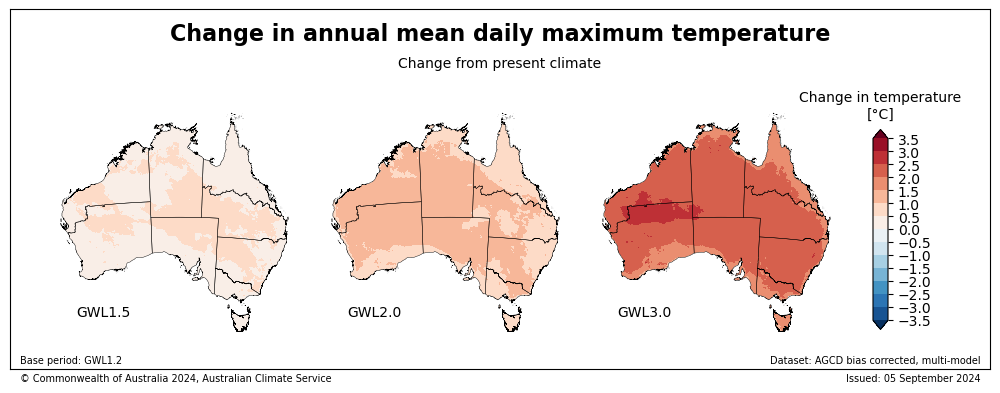

In [10]:
%%time 

var = "TXm"

ds_gwl15 = xr.open_dataset(f"/g/data/ia39/ncra/heat/data/{var}/bias-corrected/ensemble/GWL-change/{var}_AGCD-05i_MME50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL15-GWL12-change.nc")
ds_gwl20 = xr.open_dataset(f"/g/data/ia39/ncra/heat/data/{var}/bias-corrected/ensemble/GWL-change/{var}_AGCD-05i_MME50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL20-GWL12-change.nc")
ds_gwl30 = xr.open_dataset(f"/g/data/ia39/ncra/heat/data/{var}/bias-corrected/ensemble/GWL-change/{var}_AGCD-05i_MME50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL30-GWL12-change.nc")

plot_acs_hazard_3pp(ds_gwl15=ds_gwl15[var],
                    ds_gwl20=ds_gwl20[var],
                    ds_gwl30=ds_gwl30[var],
                    regions = regions,
                    title = "Change in annual mean daily maximum temperature",
                    date_range = f"Change from present climate",
                    baseline="GWL1.2",
                    cmap = cmap_dict["tas_anom"],
                    ticks = np.arange(-3.5, 3.6, 0.5),
                    cbar_label = "Change in temperature\n[\N{DEGREE SIGN}C]",
                    dataset_name = "AGCD bias corrected, multi-model",
                    watermark="",)

In [11]:
#tide gauge

CPU times: user 4min 3s, sys: 535 ms, total: 4min 3s
Wall time: 4min 3s


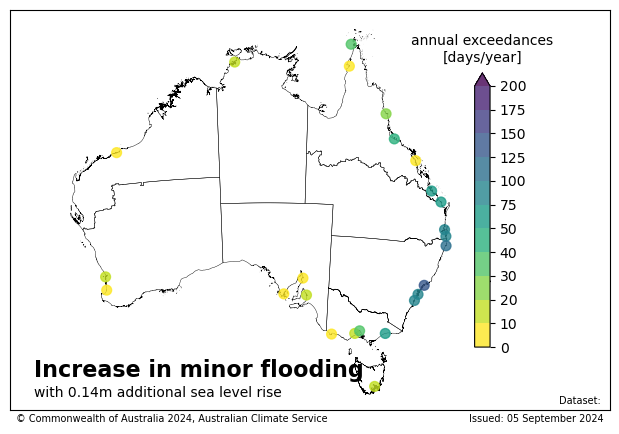

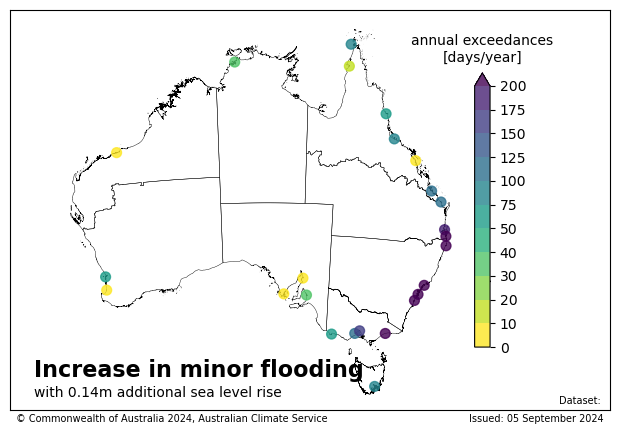

In [12]:
%%time 

var = "0.2m 50th percentile"

df = pd.read_csv("/g/data/ia39/ncra/coastal/flood_days/minor_exceeds_means.csv")

centre_text = iter(["National mean:\n19.9 days", "National mean:\n81.8 days"])
for var in ["0.2m 50th percentile", "0.38m 50th percentile"]:
    plot_acs_hazard(station_df=df[["lat", "lon", var]].sort_values(var),
                    regions = regions,
                    cmap=cm.viridis_r,
                    ticks=[0,10,20,30,40,50,75,100,125,150,175,200],
                    cbar_extend="max",
                    title = "Increase in minor flooding",
                    date_range = "with 0.14m additional sea level rise",
                    cbar_label = "annual exceedances\n[days/year]",
                    dataset_name = "",
                    watermark=None,
                    figsize=(6,4),

                   );

CPU times: user 2min 1s, sys: 189 ms, total: 2min 1s
Wall time: 2min 1s


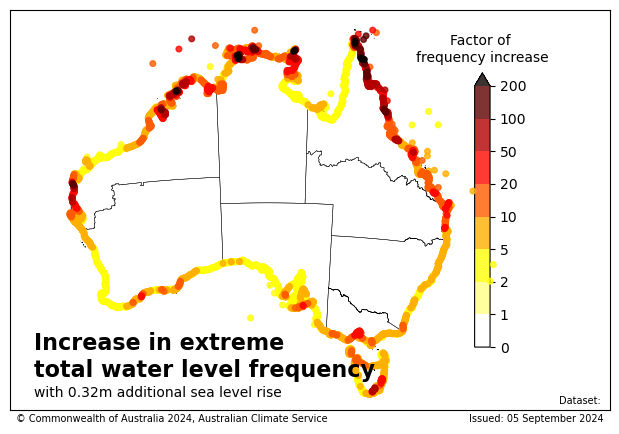

In [13]:
%%time 
var = "MTWL_MFSLR_50"

df = pd.read_csv("/g/data/ia39/ncra/coastal/MF/MFSLR_ACSSH_MMALL_SLR38cm.csv")
df = df.rename(columns = {"latitude":"lat", "longitude":"lon"})

plot_acs_hazard(station_df=df[["lat", "lon", var]].sort_values(var),
                regions = regions,
                cmap=cmap_dict['hot_r'],
                ticks=[0, 1, 2, 5, 10, 20, 50, 100, 200],
                cbar_extend="max",
                title = "Increase in extreme \ntotal water level frequency",
                # text_centre="National mean: Extremes occur\n8.8 times more often than at present\n",
                date_range = "with 0.32m additional sea level rise",
                cbar_label = "Factor of \nfrequency increase",
                dataset_name = "",
                show_logo=False,
                watermark=None,
                figsize=(6,4),
               );

CPU times: user 2min 6s, sys: 245 ms, total: 2min 6s
Wall time: 2min 7s


(<Figure size 1000x400 with 5 Axes>, <Axes: >)

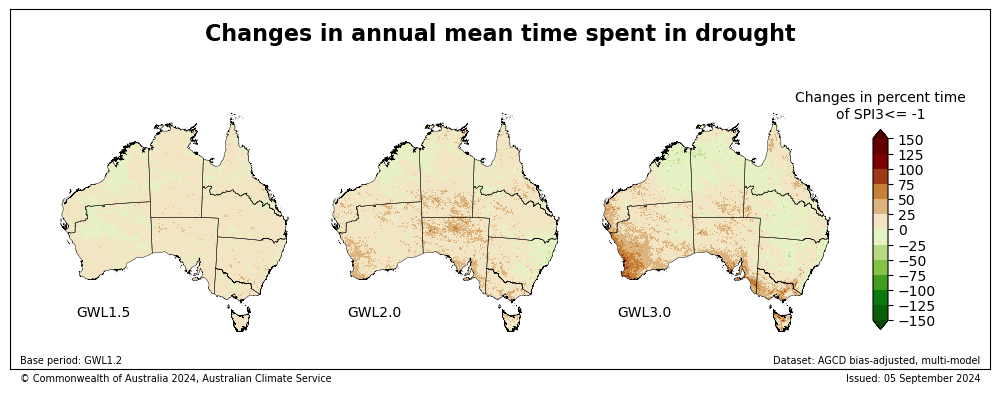

In [14]:
%%time
var="SPI3"

ds_gwl15 = xr.open_dataset(f"/g/data/ia39/ncra/drought_aridity/spi/downscaled_BC_5km/SPI3_pct_time_below_-1_MME_change_GWL1.5_to_GWL1.2_ACS-QME-AGCD-1960-2022_percentiles_10-50-90.nc").sel(quantile = 0.5)
ds_gwl20 = xr.open_dataset(f"/g/data/ia39/ncra/drought_aridity/spi/downscaled_BC_5km/SPI3_pct_time_below_-1_MME_change_GWL2.0_to_GWL1.2_ACS-QME-AGCD-1960-2022_percentiles_10-50-90.nc").sel(quantile = 0.5)
ds_gwl30 = xr.open_dataset(f"/g/data/ia39/ncra/drought_aridity/spi/downscaled_BC_5km/SPI3_pct_time_below_-1_MME_change_GWL3.0_to_GWL1.2_ACS-QME-AGCD-1960-2022_percentiles_10-50-90.nc").sel(quantile = 0.5)

plot_acs_hazard_3pp(ds_gwl15=ds_gwl15[var],
                    ds_gwl20=ds_gwl20[var],
                    ds_gwl30=ds_gwl30[var],
                    regions = regions,
                    title = "Changes in annual mean time spent in drought",
                    baseline="GWL1.2",
                    cmap = cmap_dict["aridity_anom_r"],
                    ticks = np.arange(-150, 151, 25),
                    cbar_label = "Changes in percent time\nof SPI3<= -1",
                    dataset_name = "AGCD bias-adjusted, multi-model",
                    cbar_extend="both",
                    watermark="",)

CPU times: user 2min 12s, sys: 247 ms, total: 2min 13s
Wall time: 2min 13s


(<Figure size 1000x400 with 5 Axes>, <Axes: >)

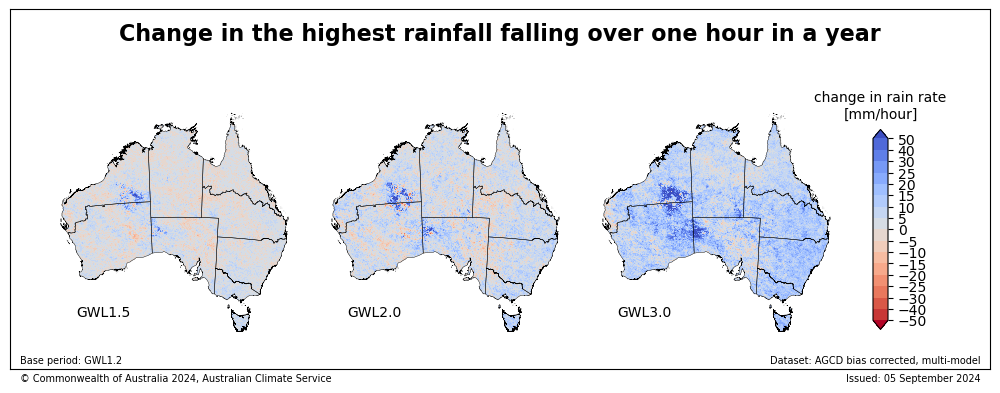

In [15]:
%%time
var = "prhmax"

ds_gwl15 = xr.open_dataset(f"/g/data/ia39/ncra/extratropical_storms/bias-corrected/ACS-QME-AGCD-1960-2022/GWLs/RX1H_AGCD-05i_MM50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL15_change.nc")
ds_gwl20 = xr.open_dataset(f"/g/data/ia39/ncra/extratropical_storms/bias-corrected/ACS-QME-AGCD-1960-2022/GWLs/RX1H_AGCD-05i_MM50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL20_change.nc")
ds_gwl30 = xr.open_dataset(f"/g/data/ia39/ncra/extratropical_storms/bias-corrected/ACS-QME-AGCD-1960-2022/GWLs/RX1H_AGCD-05i_MM50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL30_change.nc")

plot_acs_hazard_3pp(ds_gwl15=ds_gwl15[var],
                    ds_gwl20=ds_gwl20[var],
                    ds_gwl30=ds_gwl30[var],
                    regions = regions,
                    title = "Change in the highest rainfall falling over one hour in a year",
                    baseline="GWL1.2",
                    cmap = cmap_dict["anom_coolwarm_r"],
                    ticks = [-50, -40, -30, -25, -20, -15, -10, -5, 0, 5, 10, 15, 20, 25, 30, 40, 50],
                    cbar_label = "change in rain rate\n[mm/hour]",
                    dataset_name = "AGCD bias corrected, multi-model",
                    cbar_extend="both",
                    watermark="",)

CPU times: user 2min 8s, sys: 265 ms, total: 2min 8s
Wall time: 2min 9s


(<Figure size 1000x400 with 5 Axes>, <Axes: >)

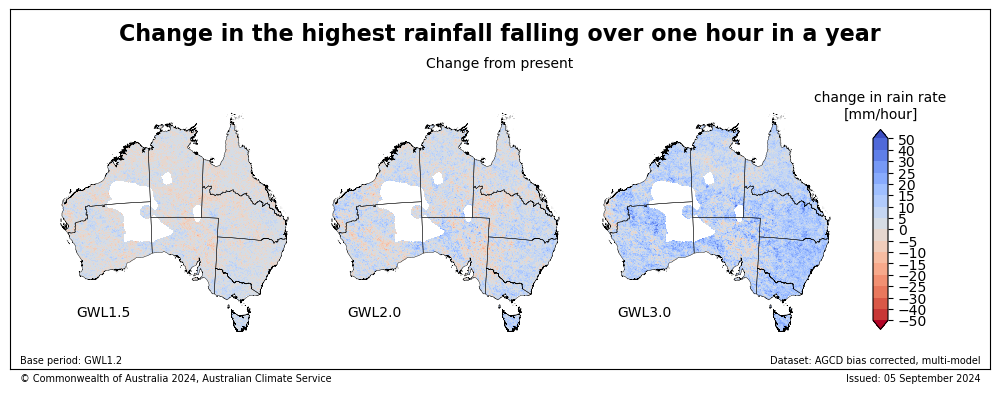

In [16]:
%%time
var = "prhmax"

ds_gwl15 = xr.open_dataset(f"/g/data/ia39/ncra/extratropical_storms/bias-corrected/ACS-QME-AGCD-1960-2022/GWLs/RX1H_AGCD-05i_MM50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL15_change.nc")
ds_gwl20 = xr.open_dataset(f"/g/data/ia39/ncra/extratropical_storms/bias-corrected/ACS-QME-AGCD-1960-2022/GWLs/RX1H_AGCD-05i_MM50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL20_change.nc")
ds_gwl30 = xr.open_dataset(f"/g/data/ia39/ncra/extratropical_storms/bias-corrected/ACS-QME-AGCD-1960-2022/GWLs/RX1H_AGCD-05i_MM50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL30_change.nc")

plot_acs_hazard_3pp(ds_gwl15=ds_gwl15[var],
                    ds_gwl20=ds_gwl20[var],
                    ds_gwl30=ds_gwl30[var],
                    regions = regions,
                    title = "Change in the highest rainfall falling over one hour in a year",
                    baseline="GWL1.2",
                    date_range="Change from present",
                    cmap = cmap_dict["anom_coolwarm_r"],
                    ticks = [-50, -40, -30, -25, -20, -15, -10, -5, 0, 5, 10, 15, 20, 25, 30, 40, 50],
                    cbar_label = "change in rain rate\n[mm/hour]",
                    dataset_name = "AGCD bias corrected, multi-model",
                    cbar_extend="both",
                    watermark="",
                   agcd_mask=True,
                   cmap_bad="w")

CPU times: user 2min 6s, sys: 325 ms, total: 2min 6s
Wall time: 2min 7s


(<Figure size 1000x400 with 5 Axes>, <Axes: >)

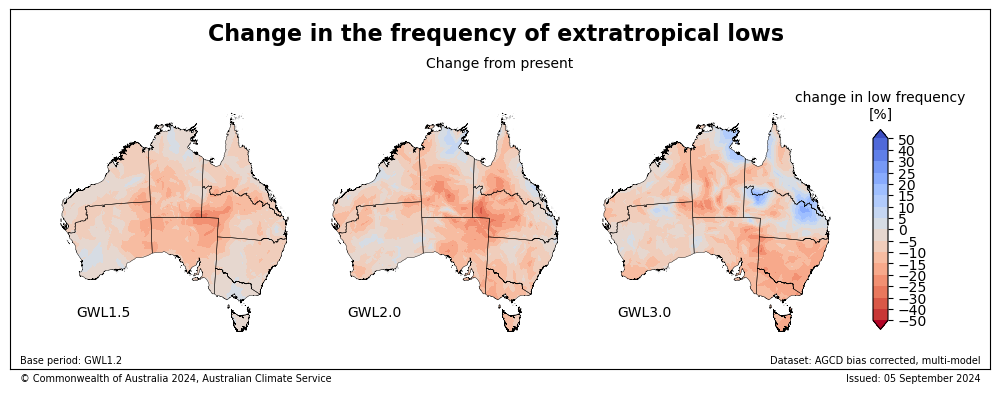

In [17]:
%%time
var = "low_freq"

ds_gwl15 = xr.open_dataset(f"/g/data/ia39/ncra/extratropical_storms/5km/GWLs/lows_AGCD-05i_MM50_ssp370_v1-r1_GWL15_change.nc")
ds_gwl20 = xr.open_dataset(f"/g/data/ia39/ncra/extratropical_storms/5km/GWLs/lows_AGCD-05i_MM50_ssp370_v1-r1_GWL20_change.nc")
ds_gwl30 = xr.open_dataset(f"/g/data/ia39/ncra/extratropical_storms/5km/GWLs/lows_AGCD-05i_MM50_ssp370_v1-r1_GWL30_change.nc")

plot_acs_hazard_3pp(ds_gwl15=ds_gwl15[var],
                    ds_gwl20=ds_gwl20[var],
                    ds_gwl30=ds_gwl30[var],
                    regions = regions,
                    title = "Change in the frequency of extratropical lows ",
                    baseline="GWL1.2",
                    date_range="Change from present",
                    cmap = cmap_dict["anom_coolwarm_r"],
                    ticks = [-50, -40, -30, -25, -20, -15, -10, -5, 0, 5, 10, 15, 20, 25, 30, 40, 50],
                    cbar_label = "change in low frequency\n[%]",
                    dataset_name = "AGCD bias corrected, multi-model",
                    contour=False,
                    contourf=False,
                    cbar_extend="both",
                    watermark="",
                  )

CPU times: user 2min 6s, sys: 281 ms, total: 2min 6s
Wall time: 2min 7s


(<Figure size 1000x400 with 5 Axes>, <Axes: >)

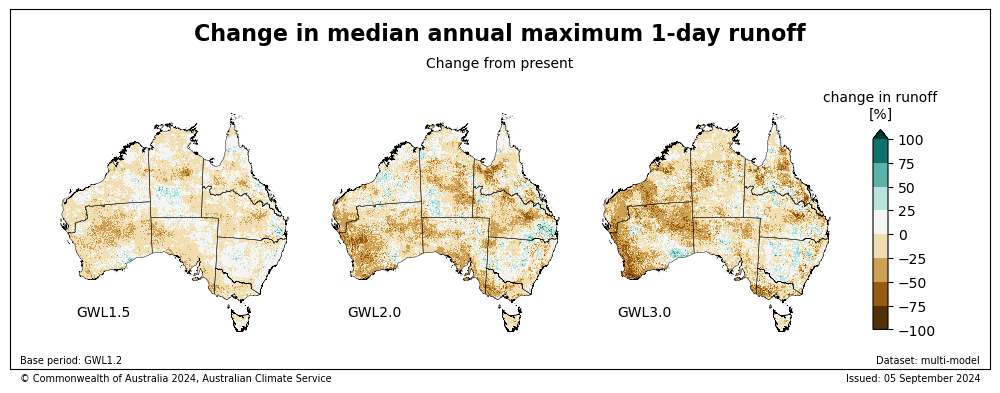

In [18]:
%%time

ds_gwl15 = xr.open_dataset(f"/g/data/ia39/ncra/flood/Runoff_Max1D/runoff_max1day_ens_change_perc/max1day_runoff_ens_change_perc_1.5.nc").rename({"longitude":"lon", "latitude":"lat"}).sel(quantile = 0.5)
ds_gwl20 = xr.open_dataset(f"/g/data/ia39/ncra/flood/Runoff_Max1D/runoff_max1day_ens_change_perc/max1day_runoff_ens_change_perc_2.nc").rename({"longitude":"lon", "latitude":"lat"}).sel(quantile = 0.5)
ds_gwl30 = xr.open_dataset(f"/g/data/ia39/ncra/flood/Runoff_Max1D/runoff_max1day_ens_change_perc/max1day_runoff_ens_change_perc_3.nc").rename({"longitude":"lon", "latitude":"lat"}).sel(quantile = 0.5)

plot_acs_hazard_3pp(ds_gwl15=ds_gwl15[f"runoff_1.5"],
                    ds_gwl20=ds_gwl20[f"runoff_2"],
                    ds_gwl30=ds_gwl30[f"runoff_3"],
                    regions = regions,
                    title = "Change in median annual maximum 1-day runoff",
                    baseline="GWL1.2",
                    date_range="Change from present",
                    cmap = cmap_dict["pr_anom"],
                    ticks = np.arange(-100, 101,25),
                    cbar_label = "change in runoff\n[%]",
                    dataset_name = "multi-model",
                    cbar_extend="max",
                    watermark="",)